In [2]:
def load_dataset():
    data = pd.read_csv('GoogleStocks.csv')
    data['date'] = data['date'].str.replace('/','-')
    data=data[1:]
    return data

def split_dataset(data):
    train, test= train_test_split(data, test_size=0.2, shuffle=False)
    return train,test

In [3]:
def initialise_prices(train_data):
    open_price = np.array(train_data['open']).astype(np.float)
    close_price = np.array(train_data['close']).astype(np.float)
    high_price = np.array(train_data['high']).astype(np.float)
    low_price = np.array(train_data['low']).astype(np.float)
    volume = np.array(data['volume']).astype(np.float)

    frac_change = (close_price-open_price)/open_price
    frac_high = (high_price - open_price)/open_price
    frac_low = (open_price - low_price)/open_price

    return frac_low, frac_high, frac_change, volume

In [4]:
def extract_features(data):
    open_price = np.array(data['open']).astype(np.float)
    close_price = np.array(data['close']).astype(np.float)
    high_price = np.array(data['high']).astype(np.float)
    low_price = np.array(data['low']).astype(np.float)
    volume = np.array(data['volume']).astype(np.float)
    
    frac_change = (close_price - open_price) / open_price
    frac_high = (high_price - open_price) / open_price
    frac_low = (open_price - low_price) / open_price

    return np.column_stack((frac_change, frac_high, frac_low))

def compute_all_possible_outcomes():
    frac_change_range = np.linspace(-0.1, 0.1, n_steps_frac_change)
    frac_high_range = np.linspace(0, 0.1, n_steps_frac_high)
    frac_low_range = np.linspace(0, 0.1, n_steps_frac_low)
    return np.array(list(itertools.product(frac_change_range, frac_high_range, frac_low_range)))

In [5]:
def get_most_probable_outcome(day_index):
    previous_data_start_index = max(0, day_index - n_latency_days)
    previous_data_end_index = max(0, day_index - 1)
    previous_data = test_data.iloc[previous_data_end_index: previous_data_start_index]
    previous_data_features =extract_features(previous_data)
    outcome_score = []
    for possible_outcome in possible_outcomes:
        total_data = np.row_stack((previous_data_features, possible_outcome))
        outcome_score.append(hmm.score(total_data))
    most_probable_outcome = possible_outcomes[np.argmax(outcome_score)]
    return most_probable_outcome
    
def predict_open_price(day_index):
    close_price = test_data.iloc[day_index]['close']
    close_price = float(close_price)
    predicted_frac_change, _, _ = get_most_probable_outcome(day_index)
    return close_price/(1 + predicted_frac_change)
 
def predict_open_prices_for_days(days, no_hidden, timesteps):
    predicted_open_prices = []
    for day_index in range(days):
        predicted_open_prices.append(predict_open_price(day_index))
    test_data_x = test_data[0: days]
    days = np.array(test_data_x['date'], dtype="datetime64[ms]")
    actual_open_prices = test_data_x['open']
    fig = plt.figure(figsize=(16,6))
    axes = fig.add_subplot(111)
    axes.plot(days, actual_open_prices, 'b-', label="actual")
    axes.plot(days, predicted_open_prices, 'r-', label="predicted")
    fig.autofmt_xdate()
    plt.legend()
    title = "Stock Prediction Using HMM (Hidden States : "+str(no_hidden)+" Time Steps : "+str(timesteps)+" )"
    plt.title(title)
    plt.show()

In [6]:
data=load_dataset()
train_data,test_data=split_dataset(data)
frac_low, frac_high, frac_change, volume=initialise_prices(train_data)
data_new=np.column_stack((frac_change, frac_high, frac_low))
n_steps_frac_change=20
n_steps_frac_high=20
n_steps_frac_low=20

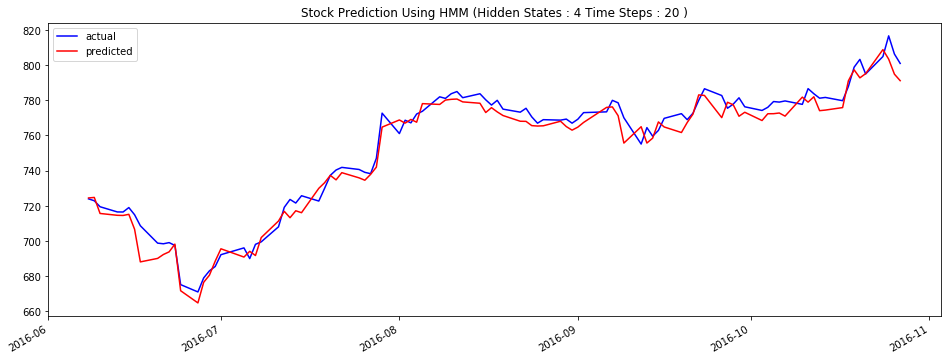

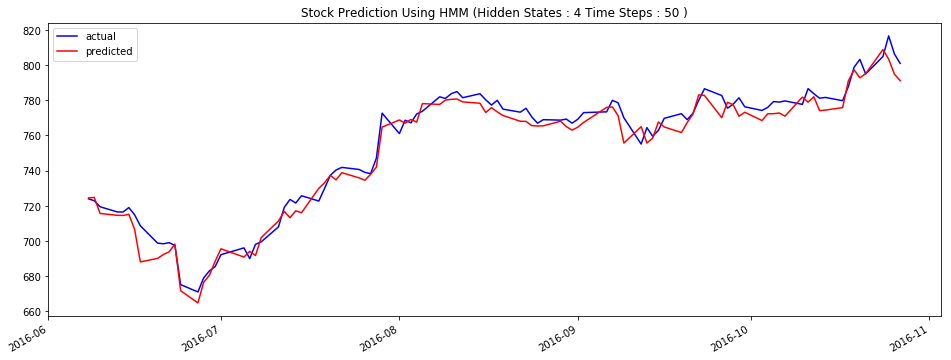

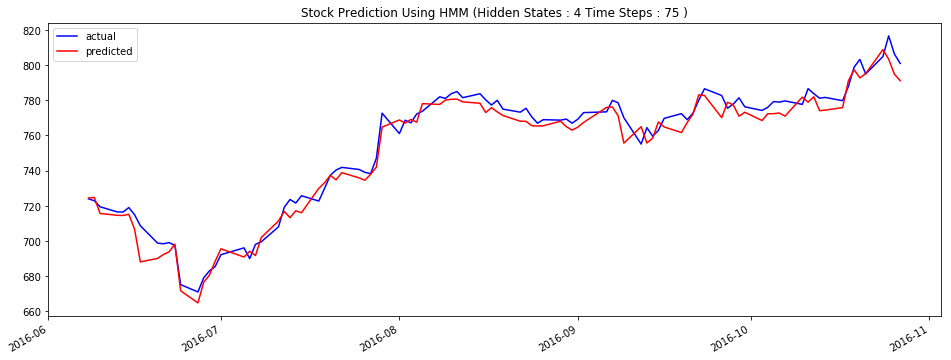

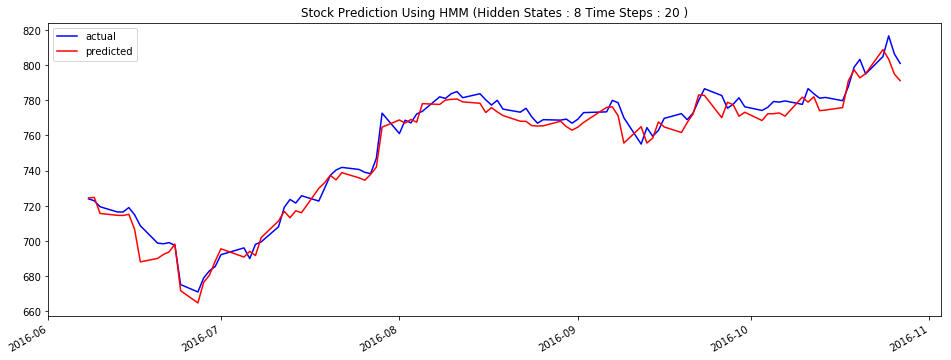

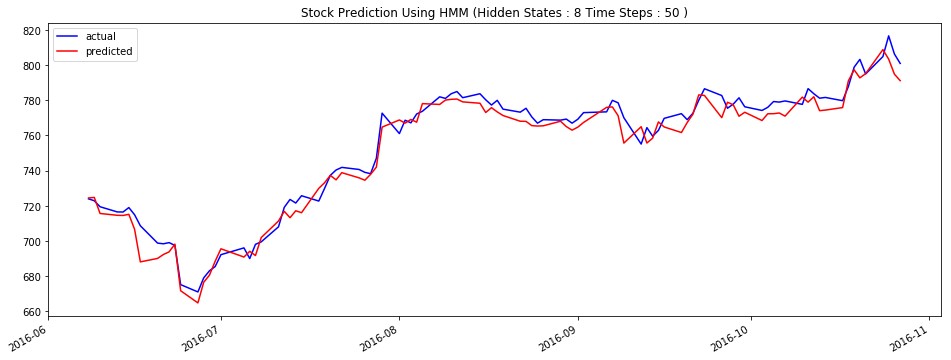

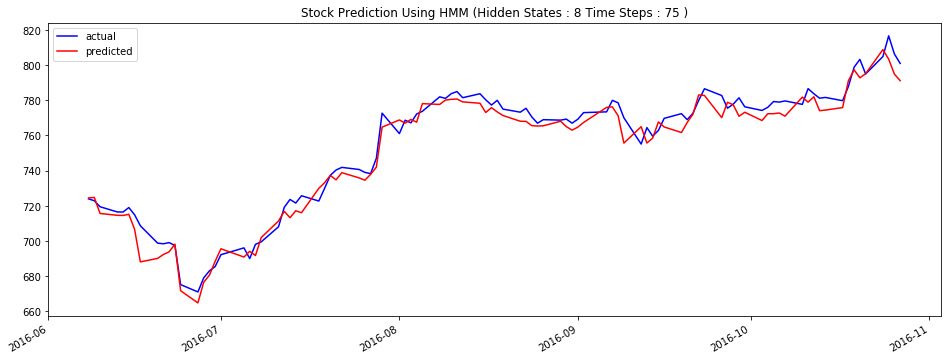

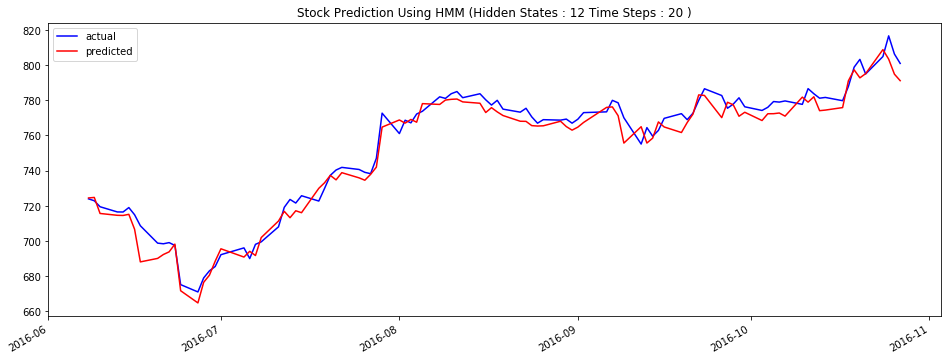

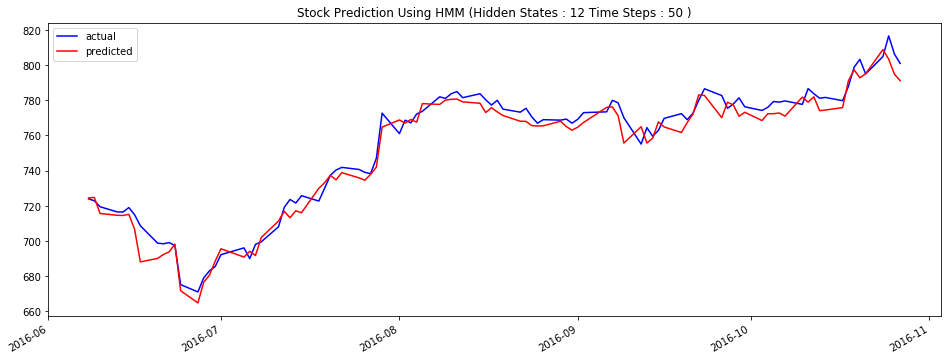

In [ ]:
for i in [4, 8, 12]:
    for j in [20, 50, 75]:
        hmm = GaussianHMM(n_components=i)
        hmm.fit(data_new)
        n_latency_days=j
        possible_outcomes=compute_all_possible_outcomes()
        predict_open_prices_for_days(100, i, j)

       We can see from above that RNN has worked better in comparision of the two.
       HMMs make the Markovian assumption — that is, you assume that the current state depends only on the previous state. That can be true or not depending on the cases which was not here so RNN performed better on Stock Prediction.